# __Input and output DFN file formats__

### Problem statement
How to import / export DFN.


<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/input_output.png" width="1000"/>
</div>
<br>
Input and output DFN file formats
</center>

### What will you learn ?
- Import DFNs from file
- Export DFNs to file

### DFN.Lab model

DFN input and output are handled with the __IO__ module. We can read/write files containing the fracture geometries and optionally, additional extras (see [Tutorial 4](004-Fractures.ipynb) for a description of extras).

In [1]:
import dfnlab.IO as io

________________________


# Import a DFN

First, we initialize the system, made of a cubic domain and an empty DFN.

In [2]:
import dfnlab.System as sys
import dfnlab.Domains as dom
import dfnlab.Fractures as dfn

system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0.,0.,0.], L1=1.)
system.setDomain(domain)
fnet = dfn.DFN()
system.setDFN(fnet)

We then import fractures into this DFN. 

**Note** that you can always use:
```python
io.preload_DFN_file(filename)
```
to check the source file and get the extent of the domain containing the fracture centers

#### FAB file format
DFN.Lab can read/write files generated by the software Fracman in the ASCII FAB file format ('.fab' extension).
<br>
In this format, fractures are defined as polygons.

In [3]:
# preload the file to get information on the number of fracture and potential domain sizes
io.preload_DFN_file('sources/Ktest.fab')
io.load_DFN_file(fnet,filename='sources/Ktest.fab', format="fracman");

The DFN will be fully constructed after we build the system.

In [4]:
system.build()
print("Number of fractures in FRACMAN file: {}".format(fnet.numFractures()))

Number of fractures in FRACMAN file: 10


We can visualize the DFN.

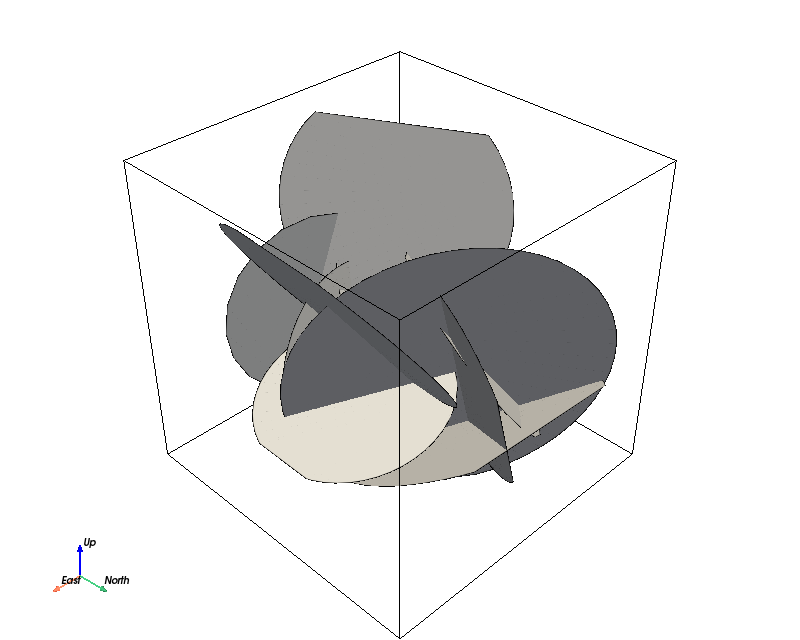

In [5]:
from sources.functions import plot_dfn
plot_dfn(system)

#### DISK file format
The DISK file format (with the '.disk' extension) is a proprietary file format developed by Itasca. This format is specifically designed to store the geometry of fractures represented as disks. Each entry in the file corresponds to a disk and includes the following information:

- id: An identifier that uniquely identifies each disk.
- center: The coordinates of the center point of the disk in the 3D space.
- diameter: The diameter of the disk, defining its size.
 - Optionally, extras: Additional information (tag name->value pairs) associated with each disk for visualization or analysis purposes, but not utilized in Itasca's core calculations.

Number of fractures in DISK file: 10


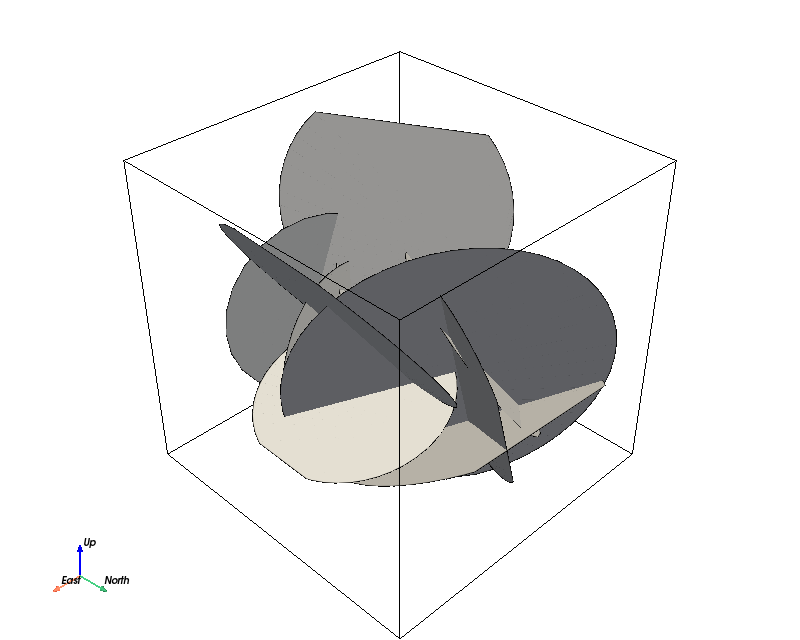

In [6]:
system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0.,0.,0.], L1=1.)
system.setDomain(domain)
fnet = dfn.DFN()
system.setDFN(fnet)

io.load_DFN_file(fnet,filename='sources/Ktest.disk', format="disk") 
system.build()
print("Number of fractures in DISK file: {}".format(fnet.numFractures()))

plot_dfn(system)

# Export a DFN

Once generated, we can export the DFN in either disk or fab format.
<br>


#### FAB file format

The FAB format correspond the to ASCII file describing fractures and used by the Fracman software.

In [7]:
io.write_DFN_file(fnet,'Tmp/my_dfn1.fab', format="fracman")

#### DISK file format

In [8]:
io.write_DFN_file(fnet,'Tmp/my_dfn1.disk', format="disk")

Extras assigned to the fractures are also exported , including the ones defined by the user. Here we use  built-in functions to save the equivalent diameter, which is the diameter of a disk having the same area as the fracture, and the number of intersections the fracture has. All built-in functions are describe in the user manual.

In [9]:
for frac in fnet:
    frac.setExtra("eq_diameter",frac.equivalentDiameter())
    frac.setExtra("nb_inter",frac.numIntersections())
io.write_DFN_file(fnet, filename='Tmp/my_dfn2.fab', format="fracman",extralist=["eq_diameter","nb_inter"])
io.write_DFN_file(fnet, filename='Tmp/my_dfn2.disk', format="disk",extralist=["eq_diameter","nb_inter"])

In [10]:
f = open('Tmp/my_dfn2.disk', 'r')
print (f.read())

;"label" id xc yc zc dip dipdir half_length family_origin aperture cluster_index length pi
10 4
"Fracture" 0 0.244267 0.0681722 -0.0954095 15.7759 85.9477 0.282056 0 1 0 0.564112 0.991684
"Fracture" 1 -0.255995 -0.1715 -0.211691 57.0846 329.05 0.418505 0 1 0 0.83701 0.839307
"Fracture" 2 0.29886 0.0775116 0.196606 54.5864 272.813 0.375228 0 1 0 0.750456 0.987292
"Fracture" 3 0.0288434 0.259341 -0.0460561 75.8303 292.384 0.309667 0 1 0 0.619334 0.961218
"Fracture" 4 -0.0277118 0.239002 -0.245398 27.4579 185.812 0.399674 0 1 0 0.799349 0.921419
"Fracture" 5 0.0343927 0.229688 -0.0569519 80.0719 214.279 0.462595 0 1 0 0.92519 0.997245
"Fracture" 6 -0.0963918 -0.122488 0.27343 74.0091 62.0712 0.340378 0 1 0 0.680757 0.902483
"Fracture" 7 -0.136344 0.158349 -0.0672052 54.3603 302.777 0.320711 0 1 0 0.641423 1
"Fracture" 8 0.077179 -0.267794 -0.0376788 87.544 13.8559 0.287246 0 1 0 0.574493 1
"Fracture" 9 0.0627129 -0.117615 -0.210221 77.2561 348.219 0.33305 0 1 0 0.666099 0.979061



#### VTP file format
DFNs can be exported into geometry files for visualisation. DFN.Lab supports VTP and STL files, that can be imported in visualisation software such as [Paraview](https://www.paraview.org).
<br>
For stereolithography file ('.stl'), only the geometry is exported (not the extras):

In [11]:
io.write_DFN_file(fnet, filename='Tmp/my_dfn.stl', format="stl")

For vtkPolydata file ('.vtp'), extras are also exported when specified by the user. By default, only the fracture id, size and area are exported as built-in extras:

In [12]:
io.write_DFN_file(fnet, filename='Tmp/my_dfn', format="vtp")

Other extras can be exported when specified by the user:

In [13]:
for frac in fnet:
    frac.setExtra("eq_diameter",frac.equivalentDiameter())
    frac.setExtra("nb_inter",frac.numIntersections())
io.write_DFN_file(fnet, filename='Tmp/my_dfn_with_extra', format="vtp",extralist=["eq_diameter","nb_inter"],binary=True)